<a href="https://colab.research.google.com/github/housemLassoued/ML-deployment/blob/main/Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd

In [103]:
df= pd.read_csv('/content/ted_main.csv')

In [104]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [106]:
df_trans = pd.read_csv('/content/transcripts.csv', sep=',', quotechar='"', on_bad_lines='skip')


In [107]:
df_trans.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


In [108]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3462 entries, 0 to 3461
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   transcript  3462 non-null   object
 1   url         3462 non-null   object
dtypes: object(2)
memory usage: 54.2+ KB


In [109]:
merged_df= pd.merge(df,df_trans,on='url')

In [110]:
merged_df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,transcript
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Good morning. How are you?(Laughter)It's been ...
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"Thank you so much, Chris. And it's truly a gre..."
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,If you're here today — and I'm very happy that...
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,"About 10 years ago, I took on the task to teac..."


In [111]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3462 entries, 0 to 3461
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            3462 non-null   int64 
 1   description         3462 non-null   object
 2   duration            3462 non-null   int64 
 3   event               3462 non-null   object
 4   film_date           3462 non-null   int64 
 5   languages           3462 non-null   int64 
 6   main_speaker        3462 non-null   object
 7   name                3462 non-null   object
 8   num_speaker         3462 non-null   int64 
 9   published_date      3462 non-null   int64 
 10  ratings             3462 non-null   object
 11  related_talks       3462 non-null   object
 12  speaker_occupation  3453 non-null   object
 13  tags                3462 non-null   object
 14  title               3462 non-null   object
 15  url                 3462 non-null   object
 16  views               3462

In [112]:
merged_df.dropna(inplace=True)

In [113]:
merged_df.shape

(3453, 18)

In [114]:
merged_df.duplicated().sum()

985

In [115]:
def remove_duplicates(merged_df):
    merged_df.drop_duplicates(inplace=True)
    return merged_df
merged_df = remove_duplicates(merged_df)

In [116]:
merged_df.duplicated().sum()

0

In [117]:
merged_df.shape

(2468, 18)

In [118]:
merged_df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,transcript
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Good morning. How are you?(Laughter)It's been ...
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"Thank you so much, Chris. And it's truly a gre..."
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,If you're here today — and I'm very happy that...
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,"About 10 years ago, I took on the task to teac..."


In [155]:
import datetime

# Assuming 'film_date' is already in 'YYYY-MM-DD' format, convert directly to datetime
merged_df['film_date'] = pd.to_datetime(merged_df['film_date'], format='%Y-%m-%d')

merged_df['published_date'] = pd.to_datetime(merged_df['published_date'], format='%Y-%m-%d')
merged_df['year'] = merged_df['published_date'].dt.year
max_views_per_year = merged_df.loc[merged_df.groupby('year')['views'].idxmax()]
for _, row in max_views_per_year.iterrows():
    print(f"Year: {row['year']}, Title: {row['title']}, Views: {row['views']}")

Year: 2006, Title: Do schools kill creativity?, Views: 47227110
Year: 2007, Title: A performance of "Mathemagic", Views: 8360707
Year: 2008, Title: My stroke of insight, Views: 21190883
Year: 2009, Title: 10 things you didn't know about orgasm, Views: 22270883
Year: 2010, Title: How great leaders inspire action, Views: 34309432
Year: 2011, Title: How to spot a liar, Views: 16861578
Year: 2012, Title: Your body language may shape who you are, Views: 43155405
Year: 2013, Title: Looks aren't everything. Believe me, I'm a model., Views: 19787465
Year: 2014, Title: How to speak so that people want to listen, Views: 21594632
Year: 2015, Title: What makes a good life? Lessons from the longest study on happiness, Views: 16601927
Year: 2016, Title: This is what happens when you reply to spam email, Views: 20475972
Year: 2017, Title: The future we're building -- and boring, Views: 5666038


<ipython-input-139-87cc7914dfdf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='views', y='main_speaker', data=top_speakers, palette='viridis')


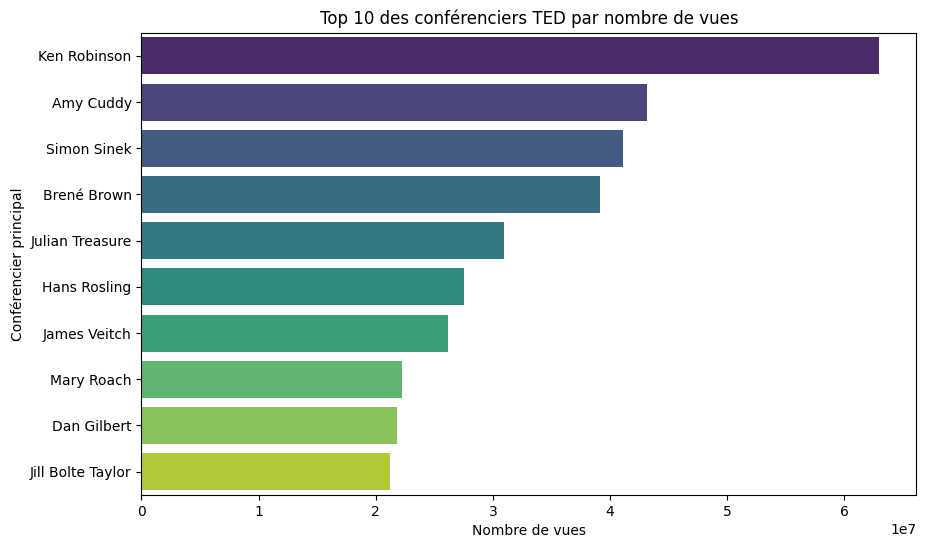

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
speaker_views = df.groupby('main_speaker')['views'].sum().reset_index()
speaker_views = speaker_views.sort_values(by='views', ascending=False)
top_speakers = speaker_views.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='views', y='main_speaker', data=top_speakers, palette='viridis')
plt.title('Top 10 des conférenciers TED par nombre de vues')
plt.xlabel('Nombre de vues')
plt.ylabel('Conférencier principal')
plt.show()

<ipython-input-140-70fd56ee17fa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='views', y='event', data=top_speakers, palette='viridis')


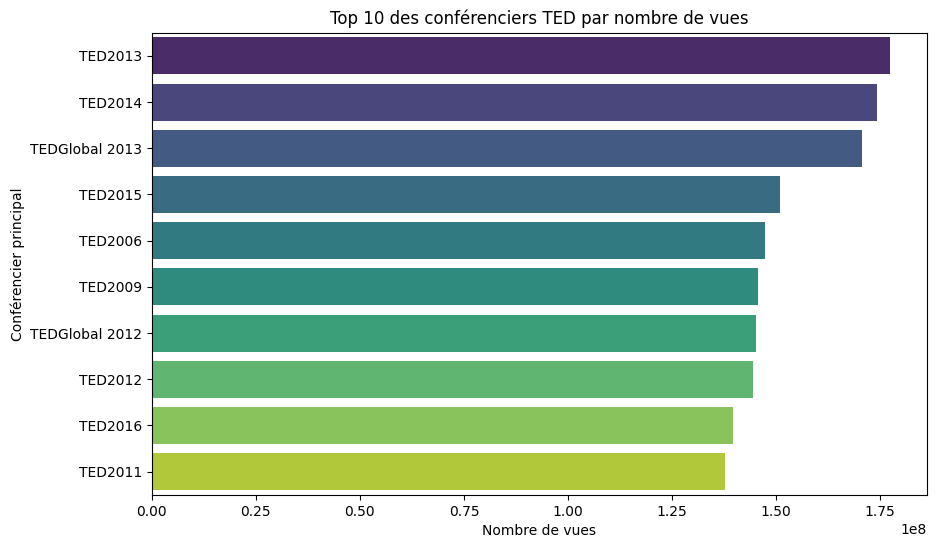

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
speaker_views = df.groupby('event')['views'].sum().reset_index()
speaker_views = speaker_views.sort_values(by='views', ascending=False)
top_speakers = speaker_views.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='views', y='event', data=top_speakers, palette='viridis')
plt.title('Top 10 des conférenciers TED par nombre de vues')
plt.xlabel('Nombre de vues')
plt.ylabel('Conférencier principal')
plt.show()

<ipython-input-141-8c3ccec97762>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='views', y='speaker_occupation', data=top_speakers, palette='viridis')


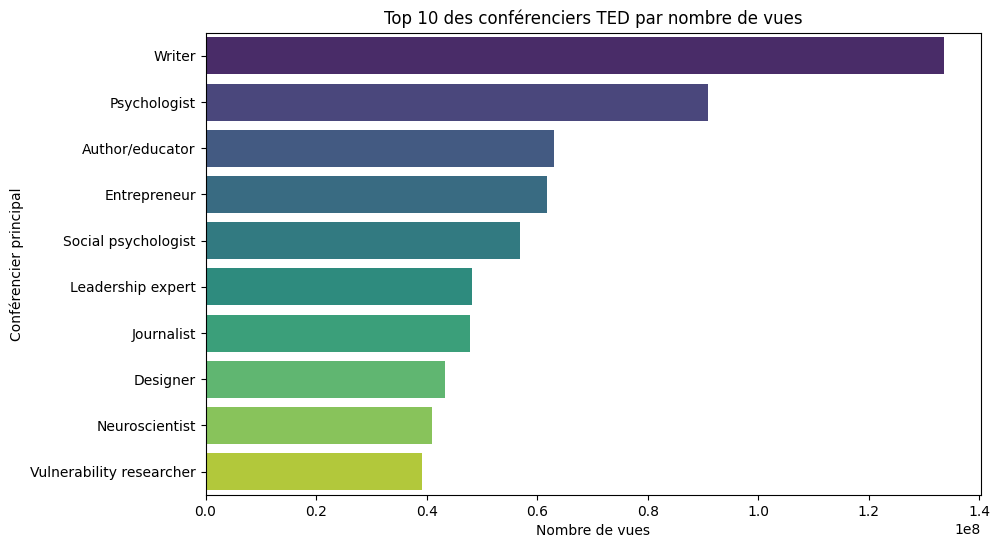

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
speaker_views = df.groupby('speaker_occupation')['views'].sum().reset_index()
speaker_views = speaker_views.sort_values(by='views', ascending=False)
top_speakers = speaker_views.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='views', y='speaker_occupation', data=top_speakers, palette='viridis')
plt.title('Top 10 des conférenciers TED par nombre de vues')
plt.xlabel('Nombre de vues')
plt.ylabel('Conférencier principal')
plt.show()

<ipython-input-144-adf7b1f3d505>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='views', y='title', data=top_talks, palette='viridis')


Text(0, 0.5, 'Titre de la conférence')

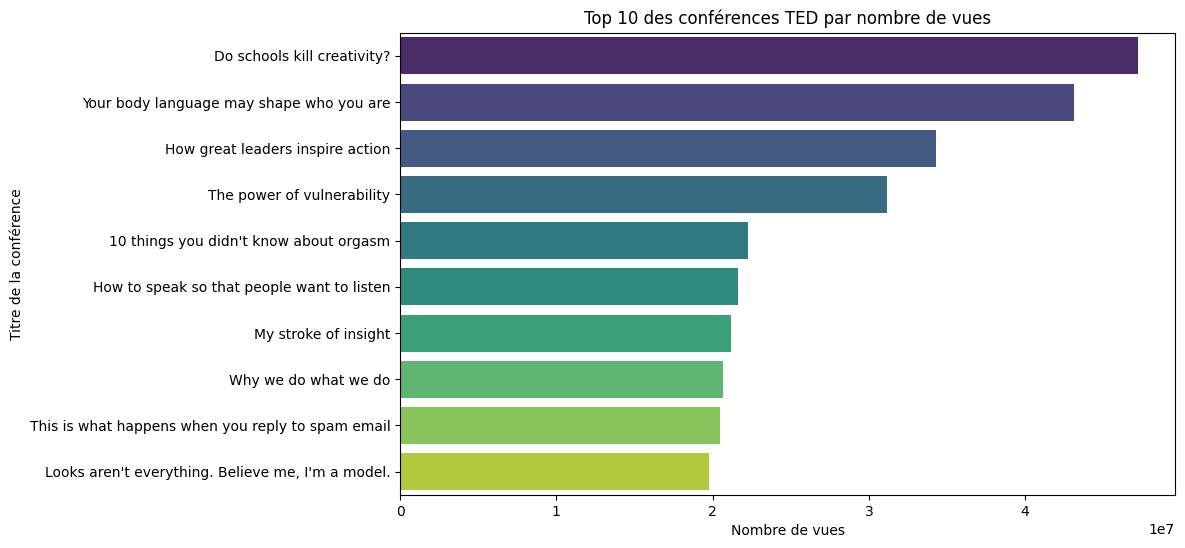

In [144]:
df_sorted = merged_df.sort_values(by='views', ascending=False)
top_talks = df_sorted.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='views', y='title', data=top_talks, palette='viridis')
plt.title('Top 10 des conférences TED par nombre de vues')
plt.xlabel('Nombre de vues')
plt.ylabel('Titre de la conférence')


<ipython-input-146-febd96941ff4>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Theme', data=top_themes, palette='viridis')


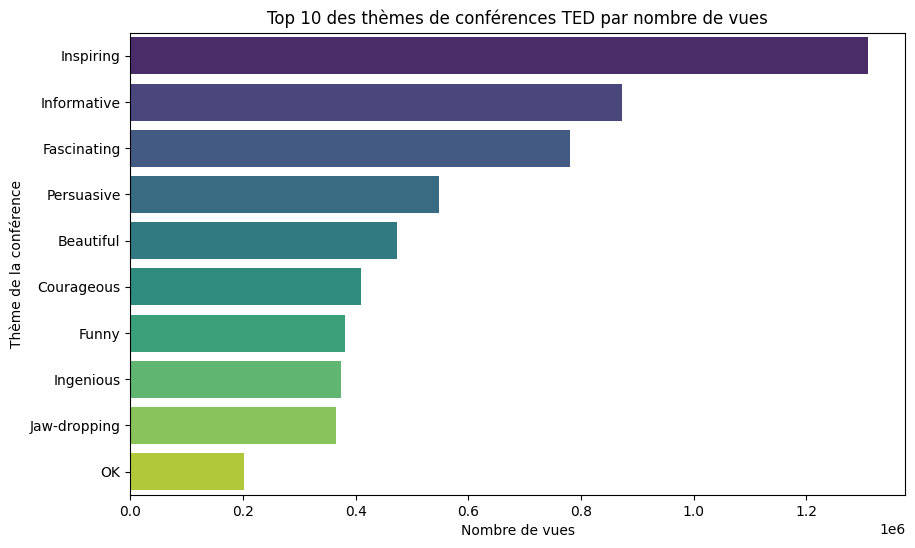

In [146]:
theme_counts = {}
for ratings in merged_df['ratings']:
    # Convert the string to a list of dictionaries
    ratings = eval(ratings)
    for rating in ratings:
        theme_name = rating['name']
        count = rating['count']
        if theme_name in theme_counts:
            theme_counts[theme_name] += count
        else:
            theme_counts[theme_name] = count
theme_df = pd.DataFrame(list(theme_counts.items()), columns=['Theme', 'Count'])
theme_df = theme_df.sort_values(by='Count', ascending=False)
top_themes = theme_df.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Theme', data=top_themes, palette='viridis')
plt.title('Top 10 des thèmes de conférences TED par nombre de vues')
plt.xlabel('Nombre de vues')
plt.ylabel('Thème de la conférence')
plt.show()


In [119]:
liste = merged_df.columns
for i in liste:
  if merged_df[i].dtype == 'object':
    print(i)

description
event
main_speaker
name
ratings
related_talks
speaker_occupation
tags
title
url
transcript


In [120]:
merged_df['title'] = merged_df['title'].astype('string')
merged_df['description'] = merged_df['description'].astype('string')
merged_df['transcript'] = merged_df['transcript'].astype('string')

In [121]:
merged_df['content']= merged_df['title'] + ' ' + merged_df['description']+ ' ' + merged_df['transcript']

In [122]:
merged_df.drop([ 'description', 'transcript'], axis=1, inplace=True)

In [123]:
import re
def remove_punctuation(text):
    re.sub(r'[^\w\s]', '', text)
    return text
merged_df['content'] = merged_df['content'].apply(remove_punctuation)


In [124]:
def to_lower(text):
    return text.lower()
merged_df['content'] = merged_df['content'].apply(to_lower)

In [125]:
def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text).strip()
merged_df['content'] = merged_df['content'].apply(remove_extra_spaces)

In [126]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    return ' '.join([word for word in words if word not in stop_words])

merged_df['content'] = merged_df['content'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [127]:

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in words])
merged_df['content'] = merged_df['content'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
merged_df['content'] = merged_df['content'].astype('string')
transcript_vectors = vectorizer.fit_transform(merged_df['content'])

In [129]:
from sklearn.metrics.pairwise import cosine_similarity


cosine_similarities = cosine_similarity(transcript_vectors, transcript_vectors)


def recommend_ted_talks_Content_Based_Filtering(index, cosine_similarities, data, top_n=5):
    similar_indices = cosine_similarities[index].argsort()[-top_n-1:-1][::-1]
    return data['title'].iloc[similar_indices]


recommended_talks = recommend_ted_talks_Content_Based_Filtering(1, cosine_similarities, merged_df)
print(recommended_talks)


210                   New thinking on the climate crisis
3268          A climate solution where all sides can win
2654             The case for optimism on climate change
2482    Climate change is happening. Here's how we adapt
2468      Why climate change is a threat to human rights
Name: title, dtype: string


In [130]:
def recommend_ted_talks_Popularity_Based_Filtering(data, top_n=5):
    top_talks = data.sort_values(by='views', ascending=False).head(top_n)
    return top_talks['title']
print(recommend_ted_talks_Popularity_Based_Filtering(merged_df))

0                    Do schools kill creativity?
1267    Your body language may shape who you are
649             How great leaders inspire action
800                   The power of vulnerability
444       10 things you didn't know about orgasm
Name: title, dtype: string


In [138]:
def recommend_ted_talks_main_speaker_Based_Filtering(data, main_speaker, top_n=5):
    filtered_talks = data[data['main_speaker'] == main_speaker]
    top_talks = filtered_talks.sort_values(by='views', ascending=False).head(top_n)
    return top_talks['title']
print(recommend_ted_talks_main_speaker_Based_Filtering(merged_df, 'David Pogue'))


1406     10 top time-saving tech tips
2                    Simplicity sells
405     Cool tricks your phone can do
179                    The music wars
Name: title, dtype: string


In [132]:
def recommend_ted_talks_tags_Based_Filtering(data, tags, top_n=5):
    filtered_talks = data[data['tags'].apply(lambda x: any(tag in x for tag in tags))]
    top_talks = filtered_talks.sort_values(by='views', ascending=False).head(top_n)
    return top_talks['title']
print(recommend_ted_talks_tags_Based_Filtering(merged_df, ['science', 'technology']))

444                10 things you didn't know about orgasm
198                                  My stroke of insight
2594    This is what happens when you reply to spam email
491                              The puzzle of motivation
994                                    How to spot a liar
Name: title, dtype: string


In [150]:
def recommend_ted_talks_ratings_Based_Filtering(data, ratings, top_n=5):
    filtered_talks = data[data['ratings'].apply(lambda x: any(rating in x for rating in ratings))]
    top_talks = filtered_talks.sort_values(by='views', ascending=False).head(top_n)
    return top_talks['title']
print(recommend_ted_talks_ratings_Based_Filtering(merged_df, 'Funny'))

0                    Do schools kill creativity?
1267    Your body language may shape who you are
649             How great leaders inspire action
800                   The power of vulnerability
444       10 things you didn't know about orgasm
Name: title, dtype: string


In [133]:
def  recommend_ted_talks_speaker_occupation_Based_Filtering(data, speaker_occupation, top_n=5):
    filtered_talks = data[data['speaker_occupation'] == speaker_occupation]
    top_talks = filtered_talks.sort_values(by='views', ascending=False).head(top_n)
    return top_talks['title']
print(recommend_ted_talks_speaker_occupation_Based_Filtering(merged_df, 'Writer'))

444                10 things you didn't know about orgasm
375                          Your elusive creative genius
1658                      Depression, the secret we share
28                  Choice, happiness and spaghetti sauce
1864    How the worst moments in our lives make us who...
Name: title, dtype: string


In [134]:
def recommend_ted_talks_event_Based_Filtering(data, event, top_n=5):
    filtered_talks = data[data['event'] == event]
    top_talks = filtered_talks.sort_values(by='views', ascending=False).head(top_n)
    return top_talks['title']
print(recommend_ted_talks_event_Based_Filtering(merged_df, 'TED2014'))

1786     The new bionics that let us run, climb and dance
1804                 Hidden miracles of the natural world
1860                  Why good leaders make you feel safe
1950                     An ultra-low-cost college degree
1864    How the worst moments in our lives make us who...
Name: title, dtype: string
